# Practical Example final


In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from keras.preprocessing.text import Tokenizer
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
from sklearn.model_selection import train_test_split
from keras_preprocessing.sequence import pad_sequences
import gensim
from sklearn.linear_model import LogisticRegression
from gensim.models.doc2vec import TaggedDocument
import re
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import nltk
import re
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from collections import Counter
nltk.download('wordnet')
nltk.download('stopwords')
# 下载nltk语料库

ModuleNotFoundError: No module named 'wordcloud'

Read Dataset

In [4]:
df = pd.read_csv('all-data.csv',delimiter=',',encoding='latin-1')
df = df.rename(columns={'neutral':'sentiment','According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .':'Message'})

df.head()

,sentiment,Message
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


In [5]:
df.shape

(4845, 2)

In [6]:
df.index = range(4845)
df['Message'].apply(lambda x: len(x.split(' '))).sum()

111964

VISUALIZING THE DATA

neutral     2878
positive    1363
negative     604
Name: sentiment, dtype: int64
neutral     59.401445
positive    28.132095
negative    12.466460
Name: sentiment, dtype: float64


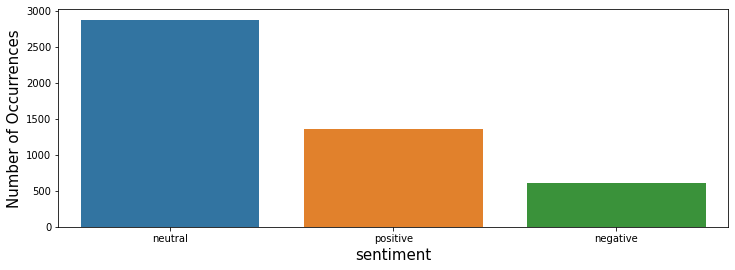

In [7]:
cnt_pro = df['sentiment'].value_counts()
print(cnt_pro)
print(str(100*cnt_pro/df.shape[0]))


plt.figure(figsize=(12,4))
sns.barplot(x=cnt_pro.index, y=cnt_pro.values, alpha=1)
plt.ylabel('Number of Occurrences', fontsize=15)
plt.xlabel('sentiment', fontsize=15)
plt.xticks(rotation=0)
plt.show()

In [8]:
#Convert string to numeric,label转为数字

sentiment  = {'positive': 0,'neutral': 1,'negative':2} 

df.sentiment = [sentiment[item] for item in df.sentiment] 
print(df)

      sentiment                                            Message
0             1  Technopolis plans to develop in stages an area...
1             2  The international electronic industry company ...
2             0  With the new production plant the company woul...
3             0  According to the company 's updated strategy f...
4             0  FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...
...         ...                                                ...
4840          2  LONDON MarketWatch -- Share prices ended lower...
4841          1  Rinkuskiai 's beer sales fell by 6.5 per cent ...
4842          2  Operating profit fell to EUR 35.4 mn from EUR ...
4843          2  Net sales of the Paper segment decreased to EU...
4844          2  Sales in Finland decreased by 10.5 % in Januar...

[4845 rows x 2 columns]


In [9]:
# 打印推文的情绪

def print_message(index):
    example = df[df.index == index][['Message', 'sentiment']].values[0]
    print(example)
    if len(example) > 0:
        
        print(example[0])
        print('Message:', example[1])
print_message(16)


["HELSINKI ( AFX ) - Shares closed higher , led by Nokia after it announced plans to team up with Sanyo to manufacture 3G handsets , and by Nokian Tyres after its fourth-quarter earnings report beat analysts ' expectations , dealers said ."
 0]
HELSINKI ( AFX ) - Shares closed higher , led by Nokia after it announced plans to team up with Sanyo to manufacture 3G handsets , and by Nokian Tyres after its fourth-quarter earnings report beat analysts ' expectations , dealers said .
Message: 0


In [10]:
print_message(0)

['Technopolis plans to develop in stages an area of no less than 100,000 square meters in order to host companies working in computer technologies and telecommunications , the statement said .'
 1]
Technopolis plans to develop in stages an area of no less than 100,000 square meters in order to host companies working in computer technologies and telecommunications , the statement said .
Message: 1


### Text Preprocessing Below 
we define a function to convert text to lower-case and strip punctuation/symbols from words and so on.


文本预处理 下面我们定义一个函数，将文本转换为小写字母，并从单词中剥离标点/符号，等等。

In [11]:
from bs4 import BeautifulSoup

# 通过Beautiful Soup库，我们可以将指定的class或id值作为参数，来直接获取到对应标签的相关数据，这样的处理方式简洁明了。

def cleanText(text):
    text = BeautifulSoup(text, "lxml").text
    text = re.sub(r'\|\|\|', r' ', text) 
    text = re.sub(r'http\S+', r'<URL>', text)
    text = text.lower()
    text = text.replace('x', '')
    return text
df['Message'] = df['Message'].apply(cleanText)
print(df)
train, test = train_test_split(df, test_size=1 , random_state=42)
# 分割训练集和测试集

print("train")
print(train)
print("test")
print(test)

C:\Users\Jiaqi\AppData\Local\Programs\Python\Python310\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


      sentiment                                            Message
0             1  technopolis plans to develop in stages an area...
1             2  the international electronic industry company ...
2             0  with the new production plant the company woul...
3             0  according to the company 's updated strategy f...
4             0  financing of aspocomp 's growth aspocomp is ag...
...         ...                                                ...
4840          2  london marketwatch -- share prices ended lower...
4841          1  rinkuskiai 's beer sales fell by 6.5 per cent ...
4842          2  operating profit fell to eur 35.4 mn from eur ...
4843          2  net sales of the paper segment decreased to eu...
4844          2  sales in finland decreased by 10.5 % in januar...

[4845 rows x 2 columns]
train
      sentiment                                            Message
1684          0  upm-kymmene has generated four consecutive qua...
1044          1  in the method 

In [17]:
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')

def tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text):
        # send_tokenize(blabla) 对文本按照句子进行分割 
        # sentence
        for word in nltk.word_tokenize(sent):
            #if len(word) < 0:
            if len(word) <= 0:
                continue
                # 跳过 长度小于1 的词
            tokens.append(word.lower())
    return tokens


train_tagged = train.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['Message']), tags=[r.sentiment]), axis=1)

test_tagged = test.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['Message']), tags=[r.sentiment]), axis=1)




# The maximum number of words to be used. (most frequent)
max_fatures = 500000

# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 50


#tokenizer = Tokenizer(num_words=max_fatures, split=' ')
# 使用文本的第一步就是将其拆分为单词。
# 单词称为标记（token）
# tokenizer 是一个list
# 将文本拆分为标记的过程称为标记化(tokenization)，而标记化用到的模型或工具称为tokenizer。Keras提供了Tokenizer类，用于为深度学习文本文档的预处理。
# https://zhuanlan.zhihu.com/p/55412623

tokenizer = Tokenizer(num_words=max_fatures, split=' ', filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
# 分词
# 经过fit on texts后有两个属性，分别是word_counts 和 index
tokenizer.fit_on_texts(df['Message'].values)

# print(tokenizer.word_counts)
# print(tokenizer.word_index)

X = tokenizer.texts_to_sequences(df['Message'].values)
# print(X)
X = pad_sequences(X)
print(X)
print(X.shape)
# 为了实现的简便，keras只能接受长度相同的序列输入。
# 因此如果目前序列长度参差不齐，这时需要使用pad_sequences()。
# 该函数是将序列转化为经过填充以后的一个长度相同的新序列新序列。
print('Found %s unique tokens单词和标记.' % len(X))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Jiaqi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


[[   0    0    0 ...    1  928   20]
 [   0    0    0 ...  876 5010  250]
 [   0    0    0 ...    1   88 1186]
 ...
 [   0    0    0 ...  129   38   23]
 [   0    0    0 ...   57   54   23]
 [   0    0    0 ...  961   18  295]]
(4845, 71)
Found 4845 unique tokens单词和标记.


In [18]:
X = tokenizer.texts_to_sequences(df['Message'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print(X)
print('Shape of data tensor:', X.shape)

[[   0    0    0 ...    1  928   20]
 [   0    0    0 ...  876 5010  250]
 [   0    0    0 ...    1   88 1186]
 ...
 [   0    0    0 ...  129   38   23]
 [   0    0    0 ...   57   54   23]
 [   0    0    0 ...  961   18  295]]
Shape of data tensor: (4845, 50)


In [19]:
# train_tagged.values[2173]
train_tagged.values

array([TaggedDocument(words=['upm-kymmene', 'has', 'generated', 'four', 'consecutive', 'quarters', 'of', 'positive', 'free', 'cash', 'flow', '.'], tags=[0]),
       TaggedDocument(words=['in', 'the', 'method', 'the', 'smelt', 'spouts', '2', 'are', 'separated', 'from', 'the', 'working', 'area', '6', 'by', 'a', 'shielding', 'wall', '8', ',', '10', 'arranged', 'movable', 'in', 'relation', 'to', 'the', 'smelt', 'spouts', '.'], tags=[1]),
       TaggedDocument(words=['``', 'that', "'s", 'a', 'very', 'high', 'figure', 'on', 'the', 'european', 'scale', ',', '``', 'noop', 'said', ',', 'recalling', 'however', 'that', 'this', 'also', 'includes', 'beer', 'bought', 'by', 'finnish', 'tourists', '.'], tags=[1]),
       ...,
       TaggedDocument(words=['proha', 'plc', '(', 'euronet', ':7327', ')', 'announced', 'today', '(', '19', 'may', ')', 'that', 'its', 'fully-owned', 'subsidiary', ',', 'safran', 'software', 'solutions', 'as', ',', 'has', 'agreed', 'to', 'sell', 'its', '49', '%', 'share', 'of', '

### Doc2Vec 模型

Model DM = 1

This work use DM=1 (it preserve word order)

dm 定义了训练的算法。默认是dm=1,使用 ‘distributed memory’ (PV-DM)，否则 distributed bag of words (PV-DBOW)。


vector_size 是特征向量的纬度。


window 是要预测的词和文档中用来预测的上下文词之间的最大距离。


min_count 忽略总频数小于此的所有的词， 默认值为5。


workers：用于控制训练的并行数。


alpha 是初始化的学习速率，会随着训练过程线性下降。


min_alpha：学习率的最小值。


epochs：(int, optional) - 语料库上的迭代次数（epochs）。


iter： 迭代次数，默认为5。


hs: 如果为1则会采用hierarchica·softmax技巧。如果设置为0（默认），则使用negative sampling。


seed 用于随机数发生器。与初始化词向量有关。需要注意的是，对于一个完全明确的重复运行（fully deterministically-reproducible run），你必须同时限制模型单线程工作以消除操作系统线程调度中的有序抖动。（在python3中，解释器启动的再现要求使用PYTHONHASHSEED环境变量来控制散列随机化）


sample: 高频词汇的随机降采样的配置阈值，默认为1e-3，范围是(0,1e-5)。


max_vocab_size 在词汇累积的时候限制内存。如果有很多独特的词多于此，则将频率低的删去。每一千万词类大概需要1G的内存，设为None以不限制（默认）。

In [20]:
d2v_model = Doc2Vec(dm=1, dm_mean=1, vector_size=20, window=8, min_count=1, workers=1, alpha=0.065, min_alpha=0.065)
d2v_model.build_vocab([x for x in tqdm(train_tagged.values)])
# d2v_model.build_vocab(train_tagged.values)

# tqdm 是个进度条

100%|█████████████████████████████████████████████████████████████████████████| 4844/4844 [00:00<00:00, 2420155.88it/s]


In [21]:
%%time

for epoch in range(30):
#     d2v_model.train(utils.shuffle(train_tagged.values), total_examples=len(train_tagged.values), epochs=1)

    d2v_model.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
    d2v_model.alpha -= 0.002
    d2v_model.min_alpha = d2v_model.alpha

100%|█████████████████████████████████████████████████████████████████████████| 4844/4844 [00:00<00:00, 2814797.53it/s]


CPU times: total: 8.33 s
Wall time: 9.31 s


In [22]:
print(d2v_model)

Doc2Vec<dm/m,d20,n5,w8,s0.001>


In [23]:
len(d2v_model.wv)

11682

In [24]:
# save the vectors in a new matrix
embedding_matrix = np.zeros((len(d2v_model.wv)+ 1, 20))

for i, vec in enumerate(d2v_model.dv.vectors):
#     enumerate() 函数用于将一个可遍历的数据对象(如列表、元组或字符串)组合为一个索引序列
    while i in vec <= 1000:
#     print(i)
#     print(model.docvecs)
        embedding_matrix[i]=vec
#     print(vec)
    print(vec[i])

-5.1612597
-0.7405589
-4.154346


# Measuring distance between two vectors (related to cosine similarity)

In [25]:
d2v_model.wv.most_similar(positive=['profit'], topn=10)

[('loss', 0.8817566633224487),
 ('bill', 0.8089773654937744),
 ('pharma', 0.7367307543754578),
 ('4.9', 0.7343217134475708),
 ('income', 0.7280437350273132),
 ('celebrates', 0.7197151184082031),
 ('sharpest', 0.7102940082550049),
 ('44.0', 0.6942570209503174),
 ('sales', 0.6908271312713623),
 ('1.42', 0.6890868544578552)]

In [26]:
d2v_model.wv.most_similar(positive=['investment'], topn=10)


[('fund', 0.8633069396018982),
 ('detailing', 0.7691982984542847),
 ('95.3', 0.7597294449806213),
 ('property', 0.7517062425613403),
 ('fair', 0.7352062463760376),
 ('municipality', 0.7315191626548767),
 ('hardest', 0.7084813117980957),
 ('i.', 0.6990671157836914),
 ('prepare', 0.6854556202888489),
 ('eploring', 0.6851708292961121)]

In [27]:
d2v_model.wv.most_similar(positive=['broke'], topn=10)

[('mold', 0.9288378953933716),
 ('warmly', 0.8566070795059204),
 ('macro-economic', 0.8519800305366516),
 ('aboavista', 0.8456667065620422),
 ('aptly', 0.8417874574661255),
 ('gather', 0.8405716419219971),
 ('kivimeister', 0.8403241038322449),
 ('unsecured', 0.8396950960159302),
 ('happening', 0.8379810452461243),
 ('``', 0.8233175277709961)]

In [28]:
print(d2v_model.wv)
# for word in d2v_model.wv.index_to_key:
#     print(word)

KeyedVectors<vector_size=20, 11682 keys>


Plot Similarity word in Doc2vec

In [29]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []
    for word in d2v_model.wv.index_to_key:
#         print("#", end='')
        tokens.append(model[word])
        labels.append(word)
    print("第一步完成")
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=250, random_state=23)
    new_values = tsne_model.fit_transform(tokens)
    
    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
    print("第二步完成")

    
    plt.figure(figsize=(16, 16)) 
#     print("开始画图")
#     for i in range(len(x)):
#         plt.scatter(x[i],y[i])
#         plt.annotate(labels[i],
#                      xy=(x[i], y[i]),
#                      xytext=(5, 2),
#                      textcoords='offset points',
#                      ha='right',
#                      va='bottom')
    
#     plt.show()
    
tsne_plot(d2v_model)

第一步完成


C:\Users\Jiaqi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\Jiaqi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


第二步完成


<Figure size 1152x1152 with 0 Axes>

# Create the LSTM Model

The parameter used here inspired by [3].



In [30]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding


# init layer
model = Sequential()
# 顺序模型


# emmbed word vectors
model.add(Embedding(len(d2v_model.wv)+1,20,input_length=X.shape[1],weights=[embedding_matrix],trainable=True))

# learn the correlations
def split_input(sequence):
     return sequence[:-1], tf.reshape(sequence[1:], (-1,1))
    
    
model.add(LSTM(50,return_sequences=False))
# FC层在keras中叫做Dense层
model.add(Dense(3,activation="softmax"))

# output model skeleton
model.summary()
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=['acc'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 20)            233660    
                                                                 
 lstm (LSTM)                 (None, 50)                14200     
                                                                 
 dense (Dense)               (None, 3)                 153       
                                                                 
Total params: 248,013
Trainable params: 248,013
Non-trainable params: 0
_________________________________________________________________


In [31]:
from keras.utils import plot_model
import pydot
import graphviz
plot_model(model, to_file='model.png')

ModuleNotFoundError: No module named 'pydot'

In [32]:
Y = pd.get_dummies(df['sentiment']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.15, random_state = 17)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(4118, 50) (4118, 3)
(727, 50) (727, 3)


In [33]:
batch_size = 20
history=model.fit(X_train, Y_train, epochs =50, batch_size=batch_size, verbose = 2)
# 87%
# batch_size = 20
# history=model.fit(X_train, Y_train, epochs =50, batch_size=batch_size, verbose = 2)

Epoch 1/50
206/206 - 5s - loss: 0.5234 - acc: 0.6178 - 5s/epoch - 23ms/step
Epoch 2/50
206/206 - 2s - loss: 0.3807 - acc: 0.7334 - 2s/epoch - 12ms/step
Epoch 3/50
206/206 - 2s - loss: 0.2835 - acc: 0.8079 - 2s/epoch - 12ms/step
Epoch 4/50
206/206 - 2s - loss: 0.2256 - acc: 0.8424 - 2s/epoch - 12ms/step
Epoch 5/50
206/206 - 2s - loss: 0.1771 - acc: 0.8774 - 2s/epoch - 12ms/step
Epoch 6/50
206/206 - 2s - loss: 0.1030 - acc: 0.9526 - 2s/epoch - 12ms/step
Epoch 7/50
206/206 - 3s - loss: 0.0679 - acc: 0.9706 - 3s/epoch - 13ms/step
Epoch 8/50
206/206 - 3s - loss: 0.0713 - acc: 0.9655 - 3s/epoch - 13ms/step
Epoch 9/50
206/206 - 3s - loss: 0.0392 - acc: 0.9840 - 3s/epoch - 13ms/step
Epoch 10/50
206/206 - 3s - loss: 0.0359 - acc: 0.9840 - 3s/epoch - 13ms/step
Epoch 11/50
206/206 - 3s - loss: 0.0229 - acc: 0.9913 - 3s/epoch - 14ms/step
Epoch 12/50
206/206 - 3s - loss: 0.0170 - acc: 0.9925 - 3s/epoch - 12ms/step
Epoch 13/50
206/206 - 2s - loss: 0.0183 - acc: 0.9925 - 2s/epoch - 10ms/step
Epoch 14

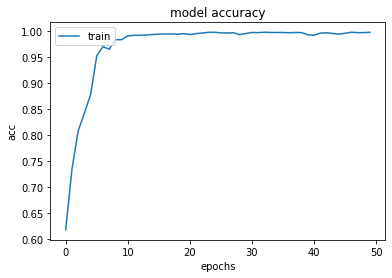

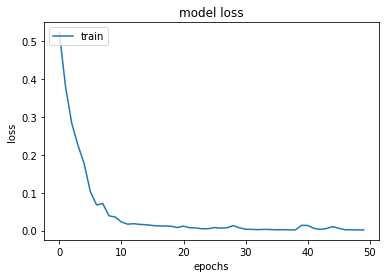

<Figure size 432x288 with 0 Axes>

In [37]:
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('model_accuracy.png')

# summarize history for loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('model_loss.png')

In [38]:
# evaluate the model
_, train_acc = model.evaluate(X_train, Y_train, verbose=2)
_, test_acc = model.evaluate(X_test, Y_test, verbose=2)
print('Train: %.3f, Test: %.4f' % (train_acc, test_acc))

129/129 - 1s - loss: 0.0015 - acc: 0.9990 - 705ms/epoch - 5ms/step
23/23 - 0s - loss: 1.1496 - acc: 0.7359 - 129ms/epoch - 6ms/step
Train: 0.999, Test: 0.7359


In [39]:
# predict probabilities for test set
yhat_probs = model.predict(X_test, verbose=0)
# print(yhat_probs)
# predict crisp classes for test set
# yhat_classes = model.predict_classes(X_test, verbose=0)

predict_x = model.predict(X_test) 
classes_x = np.argmax(predict_x,axis=1)

yhat_classes = [predict_x, classes_x]
print(yhat_classes)
# reduce to 1d array
#yhat_probs = yhat_probs[:, 0]
#yhat_classes = yhat_classes[:, 1

23/23 [==============================] - 0s 6ms/step
[array([[4.9127657e-11, 1.0000000e+00, 8.9575215e-11],
       [1.6450424e-12, 1.0000000e+00, 1.7676286e-12],
       [6.8038105e-07, 9.9999917e-01, 1.4195248e-07],
       ...,
       [9.9999678e-01, 2.1558972e-06, 1.0634305e-06],
       [1.7284724e-10, 1.0000000e+00, 1.8575166e-10],
       [1.3561961e-01, 8.6436349e-01, 1.6904452e-05]], dtype=float32), array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 2, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       2, 1, 1, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 2, 1, 1, 1, 0, 1, 0, 2, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 2, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 2, 0, 2,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 2, 0, 1,
       0, 2, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 2, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1,

In [40]:
import numpy as np
rounded_labels=np.argmax(Y_test, axis=1)
rounded_labels

array([1, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 0, 1, 0, 1, 2, 2, 1, 2, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 2, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 0, 0, 1, 1, 0, 1, 1, 2, 1, 0, 0, 2, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 2,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 2, 2, 0, 1,
       0, 2, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       0, 2, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 2, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 2, 1, 0, 2, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 2, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 2, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 2, 1, 2, 2, 1, 0, 1, 1, 0, 1, 0,

In [41]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(rounded_labels, yhat_classes[1])
cm

array([[138,  61,   9],
       [ 64, 351,  17],
       [ 19,  22,  46]], dtype=int64)

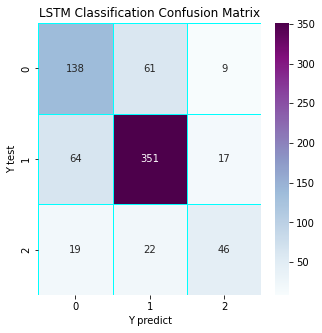

In [42]:
# The confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

lstm_val = confusion_matrix(rounded_labels, yhat_classes[1])
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(lstm_val, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="BuPu")
plt.title('LSTM Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

# Validation

In [43]:
validation_size = 610

X_validate = X_test[-validation_size:]
Y_validate = Y_test[-validation_size:]
X_test = X_test[:-validation_size]
Y_test = Y_test[:-validation_size]
score,acc = model.evaluate(X_test, Y_test, verbose = 1, batch_size = batch_size)

print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

6/6 [==============================] - 0s 5ms/step - loss: 1.0015 - acc: 0.7863
score: 1.00
acc: 0.79


**Save Model**


In [44]:
model.save('Mymodel.h5')

**Test with new and different data set aside from the data to build the model.**

note : sentiment  = {'positive': 0,'neutral': 1,'negative':2} 

In [45]:
def translate(senti):
    if int(senti) == 0:
        print('positive')
    elif int(senti) == 1:
        print('neutral')
    else :
        print('negative')
        


In [46]:
message = ['Congratulations! you have won a $1,000 Walmart gift card']
seq = tokenizer.texts_to_sequences(message)

padded = pad_sequences(seq, maxlen=X.shape[1], dtype='int32', value=0)

pred = model.predict(padded)

print(pred)
print(np.argmin(pred))
print('hello')

labels = ['0','1','2']
print(pred, labels[np.argmax(pred)])
translate(labels[np.argmax(pred)])

1/1 [==============================] - 0s 23ms/step
[[9.989191e-01 1.085937e-04 9.723416e-04]]
1
hello
[[9.989191e-01 1.085937e-04 9.723416e-04]] 0
positive


In [47]:
message = ['such massive asteroid hit will certainly create new business opportunities']
seq = tokenizer.texts_to_sequences(message)

padded = pad_sequences(seq, maxlen=X.shape[1], dtype='int32', value=0)

pred = model.predict(padded)

labels = ['0','1','2']
print(pred, labels[np.argmax(pred)])
translate(labels[np.argmax(pred)])

1/1 [==============================] - 0s 24ms/step
[[9.9999785e-01 9.7183647e-07 1.1707112e-06]] 0
positive


In [48]:
message = ['so does anyone else not open Snapchat anymore ? or is it just me ... ugh this so sad.']
seq = tokenizer.texts_to_sequences(message)

padded = pad_sequences(seq, maxlen=X.shape[1], dtype='int32', value=0)

pred = model.predict(padded)

labels = ['0','1','2']
print(pred, labels[np.argmax(pred)])
translate(labels[np.argmax(pred)])

1/1 [==============================] - 0s 23ms/step
[[1.065679e-11 1.000000e+00 9.250748e-12]] 1
neutral


In [49]:
message = ['@elonmusk had a terrible experience with a very pushy sales guy from tesla Stanford shop while shopping for model x']
seq = tokenizer.texts_to_sequences(message)

padded = pad_sequences(seq, maxlen=X.shape[1], dtype='int32', value=0)

pred = model.predict(padded)

labels = ['0','1','2']
print(pred, labels[np.argmax(pred)])
translate(labels[np.argmax(pred)])

1/1 [==============================] - 0s 25ms/step
[[1.3836565e-02 9.8615521e-01 8.1787912e-06]] 1
neutral


In [50]:
message = ['The local electronics industry is expected to remain stable amid layoff concerns surrounding Japanese electronics giants operating in the country, an official says.']
seq = tokenizer.texts_to_sequences(message)

padded = pad_sequences(seq, maxlen=X.shape[1], dtype='int32', value=0)

pred = model.predict(padded)

labels = ['0','1','2']
print(pred, labels[np.argmax(pred)])
translate(labels[np.argmax(pred)])

1/1 [==============================] - 0s 26ms/step
[[1.2919520e-09 1.0000000e+00 6.0334565e-10]] 1
neutral


In [79]:
message = ['The local electronics industry is amid layoff concerns and last year has laid off tens of employees']
seq = tokenizer.texts_to_sequences(message)

padded = pad_sequences(seq, maxlen=X.shape[1], dtype='int32', value=0)

pred = model.predict(padded)

labels = ['0','1','2']

print(pred)
print
print(pred, labels[np.argmax(pred)])
translate(labels[np.argmax(pred)])

1/1 [==============================] - 0s 31ms/step
[[4.7726424e-08 2.2454334e-08 9.9999988e-01]]
[[4.7726424e-08 2.2454334e-08 9.9999988e-01]] 2
negative


References
* [1] Artificial Inteligence, Machine Learning and Deep Learning by Mercury Learning and Informarion (Book)
* [2] Source Information of NLP :https://monkeylearn.com/what-is-text-classification/
* [3] Parameter doc2vec and  LSTM inspired  by : https://dl.acm.org/doi/10.1145/3406601.3406624
* [4] (Bing Liu. Sentiment Analysis and Opinion Mining, Morgan & Claypool Publishers, May 2012.)

In [55]:
message = ['worse day']
seq = tokenizer.texts_to_sequences(message)

padded = pad_sequences(seq, maxlen=X.shape[1], dtype='int32', value=0)

pred = model.predict(padded)

labels = ['0','1','2']
print(pred, labels[np.argmax(pred)])
translate(labels[np.argmax(pred)])

1/1 [==============================] - 0s 27ms/step
[[0.00161517 0.00796472 0.99042016]] 2
negative


In [56]:
model.save('saved.h5')

In [70]:
print((df['Message'].values).shape)


(4845,)


In [2]:
from keras.models import load_model
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
import numpy as np

def translate(senti):
    if int(senti) == 0:
        print('positive')
    elif int(senti) == 1:
        print('neutral')
    else :
        print('negative')



df = pd.read_csv('all-data.csv',delimiter=',',encoding='latin-1')
df = df.rename(columns={'neutral':'sentiment','According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .':'Message'})

md2 = load_model('saved.h5')

In [3]:
tokenizer = Tokenizer(num_words=500000, split=' ', filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['Message'].values)

message = ['The local electronics industry is amid layoff concerns and last year has laid off tens of employees']
seq = tokenizer.texts_to_sequences(message)

padded = pad_sequences(seq, maxlen=50, dtype='int32', value=0)
print(padded.shape)

pred = md2.predict(padded)

labels = ['0','1','2']
print(pred, labels[np.argmax(pred)])
translate(labels[np.argmax(pred)])

(1, 50)
1/1 [==============================] - 0s 476ms/step
[[7.9219445e-04 1.4599207e-02 9.8460859e-01]] 2
negative
